# Derivation for the HSF Auto-scaling routine
The ultimate goal is to find the maximum relative velocity between two intersecting orbits

In [17]:
from sympy import *
init_printing()

In [18]:
r,e1,e2,cosf1,cosf2,a1,a2,m1,m2,G,M = symbols("r, e1, e2, f1, f2, a1, a2, m1, m2, G, M")

In [23]:
mu = G*M
n1 = sqrt(mu/(a1**3))
n2 = sqrt(mu/(a2**3))
v1 = sqrt(mu*(2/r - 1/a1))
v2 = sqrt(mu*(2/r - 1/a2))
cosf1 = (a1*(1-e1*e1)/r - 1)/e1
cosf2 = (a2*(1-e2*e2)/r - 1)/e2
#sinf1 = sqrt(1 - cosf1*cosf1)
#sinf2 = sqrt(1 - cosf1*cosf1)
#v1_r = n1*a1/sqrt(1-e1*e1)*(e1*sinf1)       #can be +/-
#v2_r = n2*a2/sqrt(1-e2*e2)*(e2*sinf2)       #can be +/-
#v1_phi = n1*a1/sqrt(1-e1*e1)*(1+e1*cosf1)
#v2_phi = n2*a2/sqrt(1-e2*e2)*(1+e2*cosf2)

v1_phi = n1*a1/sqrt(1-e1*e1)*(1+e1)
v2_phi = n2*a2/sqrt(1-e2*e2)*(1+e2)
v1_r = -sqrt(v1*v1 - v1_phi*v1_phi)           #can be +/-
v2_r = sqrt(v2*v2 - v2_phi*v2_phi)           #can be +/-

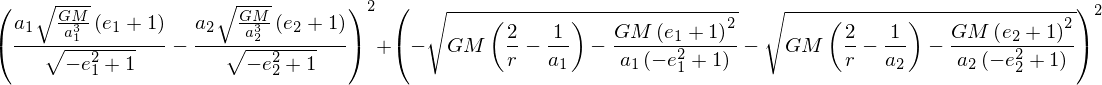

In [24]:
dv = (v1_phi - v2_phi)**2 + (v1_r - v2_r)**2
dv

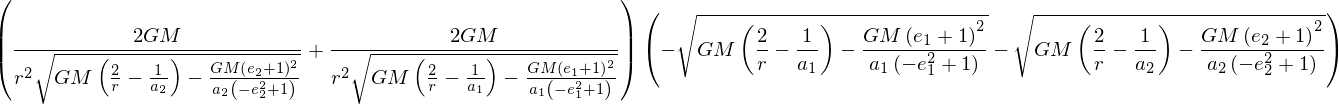

In [25]:
ddv = diff(dv,r)
ddv

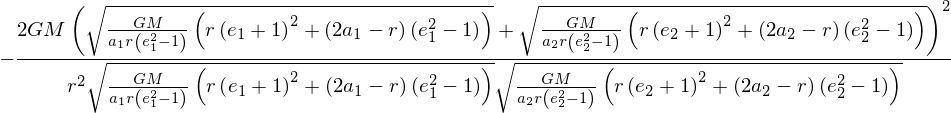

In [26]:
ddv = simplify(ddv)
ddv

# Plotting Stuff
From plotting a few simple cases, it looks like just doing v1 - v2 (i.e. a 1-D velocity solution) has no max/min solution

In [13]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

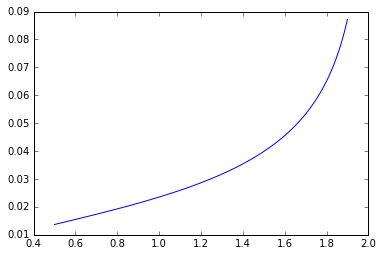

In [14]:
#1-d case - no min/max solution, the further out the greater relative velocity
a1 = 1
a2 = 1.05
r = np.linspace(0.5,1.9,100)
dv = np.sqrt(2/r - 1/a2) - np.sqrt(2/r - 1/a1)
plt.plot(r,dv)

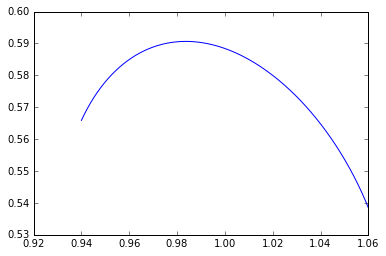

In [15]:
#2-d case - maximum exists
mu = 1
a1 = 1
a2 = 1.2
e1 = 0.07
e2 = 0.5
r = np.linspace(0.94,1.06,500)

n1 = sqrt(mu/(a1**3))
n2 = sqrt(mu/(a2**3))
cosf1 = (a1*(1-e1*e1)/r - 1)/e1
cosf2 = (a2*(1-e2*e2)/r - 1)/e2
sinf1 = np.sqrt(1 - cosf1*cosf1)         #these are +/-
sinf2 = -np.sqrt(1 - cosf2*cosf2)        #these are +/-
v1_phi = n1*a1/sqrt(1-e1*e1)*(1+e1*cosf1)
v1_r = n1*a1/sqrt(1-e1*e1)*(e1*sinf1)
v2_phi = n2*a2/sqrt(1-e2*e2)*(1+e2*cosf2)
v2_r = n2*a2/sqrt(1-e2*e2)*(e2*sinf2)

dv = ((v1_phi - v2_phi)**2 + (v1_r - v2_r)**2)**(0.5)
plt.plot(r,dv)